## Assignment 2
## Akarsh Sahu
## Date - 10/09/2019

### Part A

Load Libraries

In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing some of my preferred plotting settings
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 3

1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

-T_degC (water temperature)
-Salnty (salinity of water)
-STheta (density of water)
-O2ml_L (milliliters of dissolved oxygen per liter of water)
-Depthm (depth in meters)

In [3]:
# 1. Import full data set using Pandas

data = pd.read_csv('bottle.csv')
data.head()

C:\Users\akars\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):

Shape of your data should be: (661268, 5)


In [4]:
# 2. Select features and remove NaN / NA values from dataset
data = data[['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']]
df = data.dropna()
df.shape

(661268, 5)

3) Remove any STheta outliers (same as HW #1).

Shape of your data should be: (661268, 5)
Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

In [7]:
# R Remove any STheta outliers (same as HW #1)

## We will check the outliers in all the 3 variables using z-score(if z-score > 5)
from scipy import stats
z = np.abs(stats.zscore(df.STheta))
#df_1 = df.mask((df - df.mean()).abs() > 3* df.std()).dropna()
#df_1.shape
df_1 = df[z < 5]
df_1.shape

(661268, 5)

### Part B

1) Create X & y objects:

X object should be all 4 predictors. Shape should be: (661268, 4)
y object should be just your target variable (T_degC): Shape should be: (661268, 1)
Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

In [11]:
X = df_1[['Salnty', 'STheta', 'O2ml_L', 'Depthm']]
print(X.shape)
y = df_1[['T_degC']]
print(y.shape)

(661268, 4)
(661268, 1)


2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [12]:
# Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

from sklearn.model_selection import train_test_split

X, y = X.to_numpy(), y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

3) Scale all features to improve convergence in Gradient Descent.

-You should create two new X objects:

-X_train_scaled
-X_test_scaled.
Note: X_test_scaled must use the scaling parameters learned from training data.

In [85]:
#  Scale all features to improve convergence in Gradient Descent.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

### Part C

1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.


In [108]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scale, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

2) Print out the coefficients (including the intercept)

In [109]:
lin_reg.intercept_, lin_reg.coef_

(array([10.91541795]),
 array([[ 1.63046569, -4.6345913 ,  0.3020677 , -0.47495536]]))

3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!

- Call predictions y_pred_sklearn

In [111]:
y_pred_sklearn = lin_reg.predict(X_test_scale)
y_pred_sklearn

array([[16.68352894],
       [ 8.63573844],
       [10.70717149],
       ...,
       [ 6.18878341],
       [10.95304487],
       [16.36582647]])

4) Calculate the following for the test data:

mean squared error
r-squared
explained variance

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import explained_variance_score as ev

In [112]:
# mean squared error

mse(y_test, y_pred_sklearn)

0.11101117205433624

In [113]:
# r_squared

r2(y_test, y_pred_sklearn)

0.9937682503632342

In [114]:
# explained variance

ev(y_test, y_pred_sklearn)

0.9937684088237414

5) Create a scatterplot that shows actual versus predicted values for the T_degC.

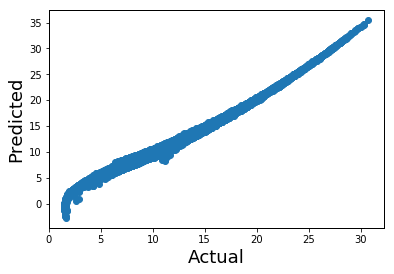

In [115]:
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predicted', fontsize=18)
plt.show()

### Part D

1) Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

In [87]:

X_train_scale_b = np.c_[np.ones((len(X_train_scale), 1)), X_train_scale]
X_test_scale_b = np.c_[np.ones((len(X_test_scale), 1)), X_test_scale]

In [107]:
y_train[0]

array([11.37])

2) The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).

Note: The Hands-on ML Github will be a helpful resource for solving Mini-Batch, but it does include a changing eta through using the learning_schedule function. Do not use a changing eta for this assignment, rather just use a static eta. This means you will need to make changes to the Github example for Mini-Batch.

In [88]:
#### mini-batch sizes of: 50

theta_path_50 = []
m = len(X_train_scale_b)
eta = 0.1
n_iterations = 100
minibatch_size = 50

np.random.seed(33)
theta_50 = np.random.randn(5,1)  # random initialization

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_train_scale_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta_50) - yi)
        eta = eta
        theta_50 = theta_50 - (eta * gradients)
        theta_path_50.append(theta_50)


In [89]:
#### mini-batch sizes of: 250

theta_path_250 = []
m = len(X_train_scale_b)
eta = 0.1
n_iterations = 100
minibatch_size = 250

np.random.seed(33)
theta_250 = np.random.randn(5,1)  # random initialization

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_train_scale_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta_250) - yi)
        eta = eta
        theta_250 = theta_250 - (eta * gradients)
        theta_path_250.append(theta_250)

In [90]:
#### mini-batch sizes of: 2000

theta_path_2000 = []
m = len(X_train_scale_b)
eta = 0.1
n_iterations = 100
minibatch_size = 2000

np.random.seed(33)
theta_2000 = np.random.randn(5,1)  # random initialization

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_train_scale_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta_2000) - yi)
        eta = eta
        theta_2000 = theta_2000 - (eta * gradients)
        theta_path_2000.append(theta_2000)

In [92]:
print("Theta values for Minibatch Size - 50")
print(theta_50)
print("Theta values for Minibatch Size - 250")
print(theta_250)
print("Theta values for Minibatch Size - 2000")
print(theta_2000)

Theta values for Minibatch Size - 50
[[10.90175069]
 [ 1.51136769]
 [-4.56402524]
 [ 0.28266036]
 [-0.49445975]]
Theta values for Minibatch Size - 250
[[10.91570432]
 [ 1.60208948]
 [-4.59347468]
 [ 0.27714535]
 [-0.49962669]]
Theta values for Minibatch Size - 2000
[[10.91223779]
 [ 1.63033244]
 [-4.6409989 ]
 [ 0.30222315]
 [-0.47507553]]


In [93]:
y_predict_50 = X_test_scale_b.dot(theta_50)
y_predict_250 = X_test_scale_b.dot(theta_250)
y_predict_2000 = X_test_scale_b.dot(theta_2000)

4) Calculate the following for the test data:

a) mean squared error
b) r-squared
c) explained variance

In [94]:
# mean squared error

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import explained_variance_score as ev

print(mse(y_test, y_predict_50))
print(mse(y_test, y_predict_250))
print(mse(y_test, y_predict_2000))

0.11880487356186774
0.11244958514906442
0.11108851535057446


In [95]:
# r_squared

print(r2(y_test, y_predict_50))
print(r2(y_test, y_predict_250))
print(r2(y_test, y_predict_2000))

0.9933307412761773
0.9936875032626072
0.993763908601506


In [97]:
# explained variance

print(ev(y_test, y_predict_50))
print(ev(y_test, y_predict_250))
print(ev(y_test, y_predict_2000))

0.9933445069121951
0.9936876166164587
0.9937652321645185


5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

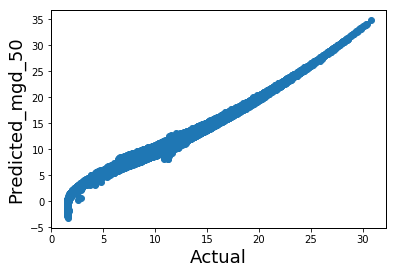

In [98]:
# batch size = 50 

plt.scatter(y_test, y_predict_50)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predicted_mgd_50', fontsize=18)
plt.show()

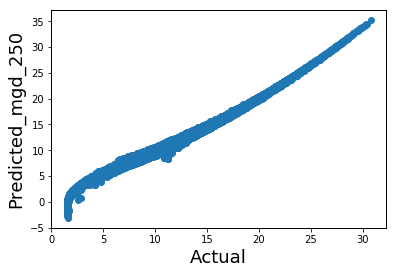

In [99]:
# batch size = 250 

plt.scatter(y_test, y_predict_250)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predicted_mgd_250', fontsize=18)
plt.show()

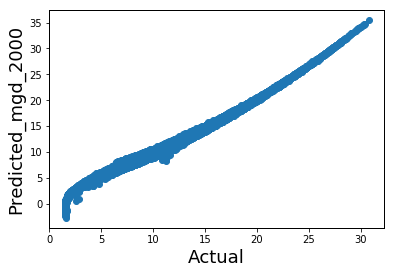

In [100]:
# batch size = 2000 

plt.scatter(y_test, y_predict_2000)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predicted_mgd_2000', fontsize=18)
plt.show()

6) Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:

- mean squared error
- r-squared
- explained variance

In [101]:
y_train_predict_50 = X_train_scale_b.dot(theta_50)
y_train_predict_250 = X_train_scale_b.dot(theta_250)
y_train_predict_2000 = X_train_scale_b.dot(theta_2000)

In [102]:
# mean squared error

print(mse(y_train, y_train_predict_50))
print(mse(y_train, y_train_predict_250))
print(mse(y_train, y_train_predict_2000))

0.11787466325801785
0.11205878639262347
0.11065214722924115


In [103]:
# r_squared

print(r2(y_train, y_train_predict_50))
print(r2(y_train, y_train_predict_250))
print(r2(y_train, y_train_predict_2000))

0.9933981506915922
0.9937238826309279
0.9938026647842023


In [104]:
# explained variance

print(ev(y_train, y_train_predict_50))
print(ev(y_train, y_train_predict_250))
print(ev(y_train, y_train_predict_2000))

0.9934086125233573
0.9937238872240236
0.993803231209459


### Part E

##### 1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.

Normal equations utilizes closed-form equations to find the value of θ (theta parameters) that minimizes the cost function. While Gradient Descent, tweaks the parameters iteratively in order to minimize a cost function. It measures the local gradient of the error function (partial derivatives) with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum. An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter.

##### 2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

Standard (or Batch) GD calculates the loss and gradients for every training example in order to update the model weight parameters. Instead, Stochastic Gradient Descent calculates the loss and gradients for each training example individually to update the model weight parameters (i.e. no sum over 'm' examples). Mini-batch Gradient Descent is somewhere in the middle. The mini-batch size here is to calculate new weight parameters after a user-defined batch size (i.e. size=50, 250, 2000).

The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs. The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima.

##### 3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.

My best performing GD model was the one with the mini-batch size of 2000 with minimum MSE = 11.06. The r-squared is over 0.99, which is extremely high and shows sign of overfitting. This model may not be the best model to generalize (high generalization error). I can use variety of methods to reduce the problem of overfitting: i.e. regularize the model (Ridge, Lasso), check if there are any multicollinearity in predictors, dimension reduction etc.

##### 4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

The size of the steps taken by the GD algorithm in the direction opposite to gradient is called the learning rate. With a high learning rate we can cover more ground each step, but we risk skipping the global minima since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the global minima since each step is very small. A low learning rate is more precise, but is not efficient in terms of 

We can change the learning rate iteratively if our algorithm is not able to reach the blobal minima. TBest practice is to start with larger learning rate and then reduce it iteratively, we can also use HESSIAN matrix(second order derivative) to calculate ideal learning rate. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum and never reach the global minima. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.


##### 5. Why would a data scientist want to use early stopping in gradient descent? 

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. For example, as an algorithm learns, its prediction error on the training set naturally goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and actually starts to go back up indicating that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. One reason why data scientists want to use early stopping in GD is that early stopping is such a simple and efficient regularization technique to avoid high generalization error, especially important in the real world scenario where finding the optimal model that can be generalized is very important. Also, early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit helping data scientist make better decisions for tuning the models.